Dance ce Notebook on test l'utilisation de YOLO pour la détection des personnes dans une vidéo.

cela consite a faire : 

1. Importer les librairies nécessaires
2. Charger le modèle pré-entrainé
3. Prendre une video et afficher ses frames
4. Detecter les objets présents sur une frame avec YOLO
5. Afficher les résultats


In [ ]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path

In [46]:
model = YOLO("yolov8n.pt") 
VIDEOS_DIR = Path("../../data/videos")
video_path = VIDEOS_DIR / "CAMERA_HALL_PORTE_DROITE.MP4"

In [47]:
cap = cv2.VideoCapture(str(video_path))

# Lire une frame au milieu de la vidéo
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
target_frame_id = total_frames // 2

cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_id)
ret, frame = cap.read()
cap.release()

ret, frame.shape

(True, (1280, 720, 3))

(np.float64(-0.5), np.float64(719.5), np.float64(1279.5), np.float64(-0.5))

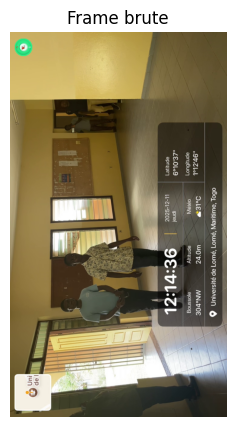

In [48]:
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.title("Frame brute")
plt.axis("off")


In [49]:
import numpy as np

def rotate_frame(frame, k):
    frame = np.rot90(frame, k)
    return np.ascontiguousarray(frame)


def best_orientation(frame, model):
    best_frame = frame
    best_score = -1
    best_k = 0

    for k in [0, 1, 2, 3]:
        test_frame = rotate_frame(frame, k)
        results = model(test_frame, conf=0.4, classes=[0], verbose=False)
        num_persons = len(results[0].boxes)

        if num_persons > best_score:
            best_score = num_persons
            best_frame = test_frame
            best_k = k

    return best_frame, best_k


In [50]:
frame_corrected, rotation_k = best_orientation(frame, model)
rotation_k


3

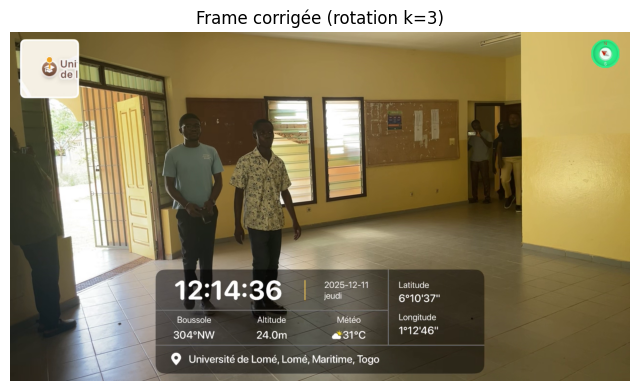

In [51]:
plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(frame_corrected, cv2.COLOR_BGR2RGB))
plt.title(f"Frame corrigée (rotation k={rotation_k})")
plt.axis("off")
plt.show()


(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

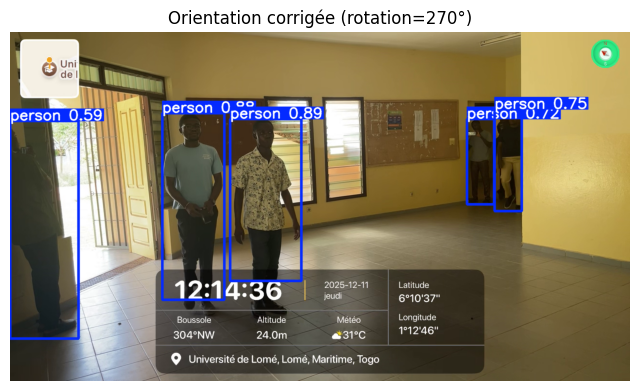

In [52]:
results = model(frame_corrected, conf=0.4, classes=[0])
annotated = results[0].plot()

plt.figure(figsize=(8,5))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.title(f"Orientation corrigée (rotation={rotation_k * 90}°)")
plt.axis("off")


In [53]:
detections = results[0].boxes

for box in detections:
    x1, y1, x2, y2 = box.xyxy[0].tolist()
    confidence = float(box.conf[0])
    cls = int(box.cls[0])
    
    print(f"PERSON | conf={confidence:.2f} | bbox=({int(x1)}, {int(y1)}, {int(x2)}, {int(y2)})")


PERSON | conf=0.89 | bbox=(454, 179, 601, 513)
PERSON | conf=0.88 | bbox=(314, 167, 442, 552)
PERSON | conf=0.75 | bbox=(1000, 159, 1056, 369)
PERSON | conf=0.72 | bbox=(943, 179, 999, 355)
PERSON | conf=0.59 | bbox=(0, 183, 141, 632)


In [1]:
import torch, detectron2
print("Torch:", torch.__version__)
print("Detectron2 OK")


ModuleNotFoundError: No module named 'detectron2'